# Sudoku Solver using backtracking

# Code
Now we will import all the necessary libraries.

In [87]:
import copy

import matplotlib.pyplot as plt

This function is to draw a sudoku into a table

In [88]:
def draw_sudoku(grid, changes=None):
    global step_count

    step_count += 1
    fig, ax = plt.subplots()
    ax.axis("off")

    # Replace 0s with empty strings
    step_count += 1
    grid = [
        [
            "" if cell == 0
            else cell
            for cell in row
        ]
        for row in grid
    ]

    # Create a color grid to store the colors of the cells
    step_count += 1
    color_grid = [["w"] * 9 for _ in range(9)]

    # For Debugging purpose, only change the 'changes' parameter to look at how the algorithm is getting to the solution.
    if changes is not None:
        for row, col in changes:
            # Change colour as needed
            step_count += 1
            color_grid[row][col] = "purple"

    step_count += 1
    table = ax.table(
        cellText=grid,
        cellLoc="center",
        loc="center",
        cellColours=color_grid,
        bbox=[0, 0, 1, 1],
    )

    # Adjust the width and height of the cells in the table
    step_count += 1
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)

    # Increase line thickness of every 3x3 sub-table
    for i in range(10):
        step_count += 1
        if i % 3 == 0:
            ax.plot(
                [i / 9, i / 9],
                [0, 1],
                color="black",
                linewidth=3,
                transform=ax.transAxes,
            )
            ax.plot(
                [0, 1],
                [i / 9, i / 9],
                color="black",
                linewidth=3,
                transform=ax.transAxes,
            )

    step_count += 1
    plt.show()

Now please enter `1` to input your Sudoku, or it will use the Default to Solve.

In [89]:
def input_sudoku():
    global step_count

    # Example usage:
    sudoku_grid = [
        [1, 0, 0, 0, 0, 7, 0, 9, 0],
        [0, 3, 0, 0, 2, 0, 0, 0, 8],
        [0, 0, 9, 6, 0, 0, 5, 0, 0],
        [0, 0, 5, 3, 0, 0, 9, 0, 0],
        [0, 1, 0, 0, 8, 0, 0, 0, 2],
        [6, 0, 0, 0, 0, 4, 0, 0, 0],
        [3, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 4, 0, 0, 0, 0, 0, 0, 7],
        [0, 0, 7, 0, 0, 0, 3, 0, 0]
    ]

    step_count += 1
    choice = input(
        "Please enter 1 for row-wise 2 for at-once if you wish to your values for solving sudoku or skip to use default ones: ")
    if choice == '1':
        for i in range(9):
            step_count += 1
            sudoku_grid[i] = list(map(int, input(f"Please enter {i + 1}th row elements: ").split()))
    if choice == '2':
        step_count += 1
        grid = list(map(int, input(f"Please pase the entire sudoku: ").split()))
        sudoku_grid = [grid[i * 9:(i + 1) * 9] for i in range(9)]

    step_count += 1
    return sudoku_grid

Now let's solve the Sudoku.

Now we will implement a function to get the next empty location first in the row next in the column.

In [90]:
def find_next_empty(sudoku):
    global step_count
    # First, it will search in the current row.
    # Next, it will search in the current column.
    # Will return (row, col) as a tuple if there are any or (None, None) otherwise.

    for row in range(9):
        for col in range(9):
            step_count += 1
            if sudoku[row][col] == 0:
                return row, col

    step_count += 1
    return None, None  # When no space is empty in the given sudoku

Now this function will check is the given `guess` is appropriate in the given location

In [91]:
def is_valid(sudoku, guess, row, col):
    global debug
    global step_count

    # has to check is the given guess has occurred in the give row, in the given column, and in its respective 3x3 cube
    # returns True if it is a valid guess False otherwise.

    # Now we will check in the row
    step_count += 1
    if guess in sudoku[row]:
        if debug:
            print(f"{guess} is in row {row}")
        return False

    # Now we will check the column
    step_count += 1
    col_vals = []
    for i in range(9):
        step_count += 1
        col_vals.append(sudoku[i][col])

        # col_vals = [sudoku[i][col] for i in range(9)]
        # if guess in col_vals:
    step_count += 1
    if guess in col_vals:
        if debug:
            print(f"col_vals = {col_vals}")
            print(f"{guess} is in col {col}")
        return False

    # Now we will check the 3x3 cube
    # We will do this by getting the start of each chunk by using quotients
    # ***Note this is for reference only the actual indices start from 0 to 8

    # 1,1 1,2 1,3 | 1,4 1,5 1,6 | 1,7 1,8 1,9
    # 2,1 2,2 2,3 | 2,4 2,5 2,6 | 2,7 2,8 2,9
    # 3,1 3,2 3,3 | 3,4 3,5 3,6 | 3,7 3,8 3,9
    # ------------|-------------|------------
    # 4,1 4,2 4,3 | 4,4 4,5 4,6 | 4,7 4,8 4,9
    # 5,1 5,2 5,3 | 5,4 5,5 5,6 | 5,7 5,8 5,9
    # 6,1 6,2 6,3 | 6,4 6,5 6,6 | 6,7 6,8 6,9
    # ------------|-------------|------------
    # 7,1 7,2 7,3 | 7,4 7,5 7,6 | 7,7 7,8 7,9
    # 8,1 8,2 8,3 | 8,4 8,5 8,6 | 8,7 8,8 8,9
    # 9,1 9,2 9,3 | 9,4 9,5 9,6 | 9,7 9,8 9,9

    # 0,0 | 0,1 | 0,2
    # 1,0 | 1,1 | 1,2
    # 2,0 | 2,1 | 2,2

    step_count += 1
    row_start = (row // 3) * 3
    col_start = (col // 3) * 3
    step_count += 1
    if debug:
        print(f"row_start = {row_start}, col_start = {col_start}")
    for r in range(row_start, row_start + 3):
        for c in range(col_start, col_start + 3):
            step_count += 1
            if sudoku[r][c] == guess:
                if debug:
                    print(f"{guess} is in {row_start}, {col_start} square at {r}, {c}")
                return False

    # With all the filters, now only valid guesses will remain.
    step_count += 1
    return True

Now this function will actually solve Sudoku using `back tracking`

In [92]:
def solve_sudoku(sudoku):
    global debug
    global step_count

    # Our sudoku is in the form of list-of-lists.
    # Return weather a result exists or not
    # Will mutate the result if it exists

    # Step 1 - To get the next empty slot in the order row > column
    step_count += 1
    row, col = find_next_empty(sudoku)

    # Step 2 - If there are no empty places left i.e. row, col is None, None then we return since we only allow valid inputs
    if row is None or col is None:
        step_count += 1
        return True

    step_count += 1
    if debug:
        print(f"Next Empty (Row, Col) ({row} {col})")

    # Step 3 - Now for the case where there is a place to put a number.
    for guess in range(1, 10):
        step_count += 1
        if debug:
            print(f"Current guess {guess}...")
        # Step 4 - TO check if this is a valid guess
        step_count += 1
        if is_valid(sudoku, guess, row, col):
            # Step 4.1 - Now since this guess is valid, we will start the next recursion of this entire function.
            step_count += 1
            sudoku[row][col] = guess
            if debug:
                print(f"Correct Guess {guess} at {row}, {col}")
                print(f"Change(s) found in: {row}, {col}")
                changes = [(row, col)]  # Define Changes here
                draw_sudoku(sudoku, changes)

            # Step 5 - Now we will recurse this function
            step_count += 1
            if solve_sudoku(sudoku):
                step_count += 1
                return True

        # Step 6 - This will occur if our guess is wrong OR 
        # that our guess does not solve the Sudoku 
        # then we will backtrack and try a new number
        step_count += 1
        sudoku[row][col] = 0

    # Step 7 - If this has occurred, 
    # this means that the Sudoku is Unsolvable
    # as all the possible combinations are already tried
    step_count += 1
    if debug:
        print("This sudoku is Unsolvable!!!")
        print("So, we are backtracking!")
    return False

Now the `main` function where the whole code starts executing!!!
Please enter the entire sudoku with whitespaces in between the numbers. For empty cells, please enter 0. Line by Line 

This is the initial Sudoku before solving: 


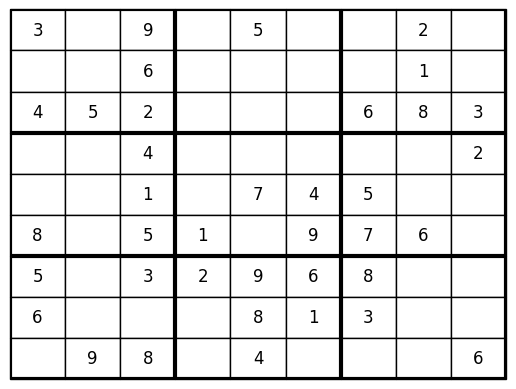

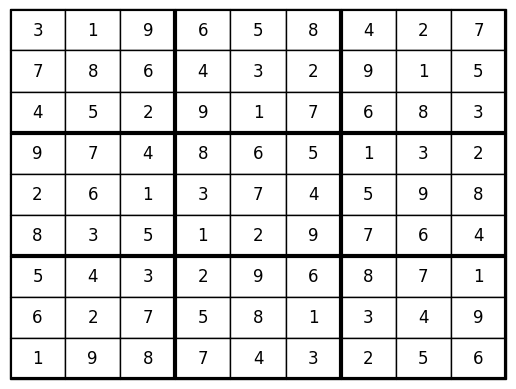

The Sudoku has been solved in 13,553.


In [93]:
if __name__ == '__main__':
    # From here the main execution starts
    # To debug toggle the below variable this is used only in the functions draw_sudoku & solve_sudoku
    debug = False
    step_count = 0

    # First enter the values
    step_count += 1
    Sudoku = input_sudoku()

    # For Testing Purpose creating a copy of the initial Sudoku before solving
    if debug:
        step_count += 1
        initial_sudoku = copy.deepcopy(Sudoku)

    # Display the entered Sudoku
    step_count += 1
    print("This is the initial Sudoku before solving: ")
    draw_sudoku(Sudoku)
    if debug:
        print("The Solving of Sudoku step by step: ")
    # Solving the Sudoku...
    if solve_sudoku(Sudoku):
        # Display the final result  
        draw_sudoku(Sudoku)
    else:
        step_count += 1
        print("Unfortunately it is not possible to solve the Sudoku.")
    num_of_steps = "{:,}".format(step_count)
    print(f"The Sudoku has been solved in {num_of_steps}.")

# Debugging of is_valid()
Debugging of is_valid() by using a simplified setup,  
The aim is to easily understand how the verification is happening, and square/cube part is kept first to demonstrate how the square is being mapped.

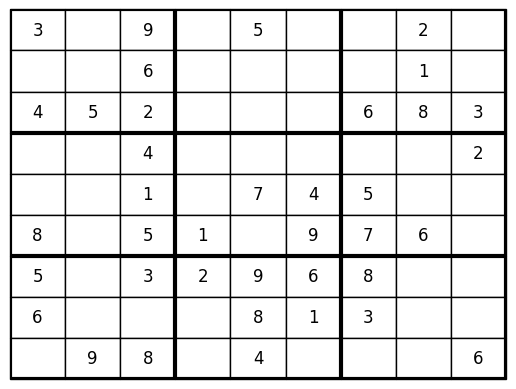

Empty cell 9, 4 is in row-start = 7, col_start = 4
1 not accepted due to 8, 6 which is in 3, 2 square
1 not accepted due to duplicate being found in row
2 not accepted due to 7, 4 which is in 3, 2 square
2 not accepted due to duplicate being found in row
4 not accepted due to 9, 5 which is in 3, 2 square
4 not accepted due to duplicate being found in row
6 not accepted due to 7, 6 which is in 3, 2 square
6 not accepted due to duplicate being found in row
8 not accepted due to 8, 5 which is in 3, 2 square
8 not accepted due to duplicate being found in row
9 not accepted due to 7, 5 which is in 3, 2 square
9 not accepted due to duplicate being found in row


In [94]:
sudoku_string = "3 0 9 0 5 0 0 2 0 0 0 6 0 0 0 0 1 0 4 5 2 0 0 0 6 8 3 0 0 4 0 0 0 0 0 2 0 0 1 0 7 4 5 0 0 8 0 5 1 0 9 7 6 0 5 0 3 2 9 6 8 0 0 6 0 0 0 8 1 3 0 0 0 9 8 0 4 0 0 0 6"

# Split the string into individual numbers and convert them to integers
sudoku_list = list(map(int, sudoku_string.split()))

# Group the numbers into sublists of 9 elements each
sudoku = [sudoku_list[i:i + 9] for i in range(0, len(sudoku_list), 9)]
draw_sudoku(sudoku)
row = 8
col = 3
row_start = (row // 3) * 3
col_start = (col // 3) * 3
print(f"Empty cell {row + 1}, {col + 1} is in row-start = {row_start + 1}, col_start = {col_start + 1}")
for guess in range(1, 10):

    for r in range(row_start, row_start + 3):
        for c in range(col_start, col_start + 3):
            if sudoku[r][c] == guess:
                r_start = (r // 3)
                c_start = (c // 3)
                print(f"{guess} not accepted due to {r + 1}, {c + 1} which is in {r_start + 1}, {c_start + 1} square")
                continue
    if guess in sudoku[row]:
        print(f"{guess} not accepted due to duplicate being found in row")
        continue
    col_vals = [sudoku[i][col] for i in range(9)]
    if guess in col_vals:
        print(f"{guess} not accepted due to duplicate being found in row")
        continue